# Lendo dados

In [31]:
import pandas as pd

file_path = 'dataset/games.csv'
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Erro: O arquivo '{file_path}' não foi encontrado.")
    exit()
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")
    exit()
df.head(8)

,Game Title,User Rating,Age Group Targeted,Price,Platform,Requires Special Device,Developer,Publisher,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,User Review Text,Game Mode,Min Number of Players
0,Grand Theft Auto V,36.4,All Ages,41.41,PC,No,Game Freak,Innersloth,2015,Adventure,No,55.3,Medium,Average,Poor,"Solid game, but too many bugs.",Offline,1
1,The Sims 4,38.3,Adults,57.56,PC,No,Nintendo,Electronic Arts,2015,Shooter,Yes,34.6,Low,Poor,Poor,"Solid game, but too many bugs.",Offline,3
2,Minecraft,26.8,Teens,44.93,PC,Yes,Bungie,Capcom,2012,Adventure,Yes,13.9,Low,Good,Average,"Great game, but the graphics could be better.",Offline,5
3,Bioshock Infinite,38.4,All Ages,48.29,Mobile,Yes,Game Freak,Nintendo,2015,Sports,No,41.9,Medium,Good,Excellent,"Solid game, but the graphics could be better.",Online,4
4,Half-Life: Alyx,30.1,Adults,55.49,PlayStation,Yes,Game Freak,Epic Games,2022,RPG,Yes,13.2,High,Poor,Good,"Great game, but too many bugs.",Offline,1
5,Grand Theft Auto V,38.6,Adults,51.73,Xbox,No,Capcom,Capcom,2017,RPG,Yes,48.8,Low,Average,Poor,"Solid game, but the graphics could be better.",Offline,4
6,Sid Meier’s Civilization VI,33.1,Adults,46.44,Mobile,No,Game Freak,Innersloth,2020,Simulation,No,36.9,High,Excellent,Good,"Solid game, but the gameplay is amazing.",Online,3
7,Just Dance 2024,32.3,Teens,36.92,Nintendo Switch,No,Capcom,Take-Two Interactive,2012,Strategy,No,52.1,Ultra,Poor,Poor,"Disappointing game, but the gameplay is amazing.",Offline,3


# Coleta e Pre processamento dos dados

In [32]:
target_column = 'User Rating'
drop_cols = [target_column, 'Game Title', 'User Review Text', 'Developer', 'Publisher']

X = df.drop(columns=drop_cols)
y = df[target_column]

X.head(8)

,Age Group Targeted,Price,Platform,Requires Special Device,Release Year,Genre,Multiplayer,Game Length (Hours),Graphics Quality,Soundtrack Quality,Story Quality,Game Mode,Min Number of Players
0,All Ages,41.41,PC,No,2015,Adventure,No,55.3,Medium,Average,Poor,Offline,1
1,Adults,57.56,PC,No,2015,Shooter,Yes,34.6,Low,Poor,Poor,Offline,3
2,Teens,44.93,PC,Yes,2012,Adventure,Yes,13.9,Low,Good,Average,Offline,5
3,All Ages,48.29,Mobile,Yes,2015,Sports,No,41.9,Medium,Good,Excellent,Online,4
4,Adults,55.49,PlayStation,Yes,2022,RPG,Yes,13.2,High,Poor,Good,Offline,1
5,Adults,51.73,Xbox,No,2017,RPG,Yes,48.8,Low,Average,Poor,Offline,4
6,Adults,46.44,Mobile,No,2020,Simulation,No,36.9,High,Excellent,Good,Online,3
7,Teens,36.92,Nintendo Switch,No,2012,Strategy,No,52.1,Ultra,Poor,Poor,Offline,3


## Mapeamento colunas ordinais

In [33]:
graphics_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2,
    'Ultra': 3
}

quality_mapping = {
    'Poor': 0,
    'Average': 1,
    'Good': 2,
    'Excellent': 3
}

try:
    X['Graphics Quality'] = X['Graphics Quality'].map(graphics_mapping)
    X['Soundtrack Quality'] = X['Soundtrack Quality'].map(quality_mapping)
    X['Story Quality'] = X['Story Quality'].map(quality_mapping)
except KeyError as e:
    print(f"Erro no mapeamento: Valor inesperado encontrado. {e}")

## Divisão dos dados

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Features numéricas
numeric_features = ['Price', 'Game Length (Hours)', 'Release Year', 'Min Number of Players',
                    'Graphics Quality', 'Soundtrack Quality', 'Story Quality']

# Features categóricas
categorical_features = ['Age Group Targeted', 'Platform', 'Requires Special Device', 'Genre', 'Multiplayer', 'Game Mode']

# Divisão dos Dados (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Dados divididos: {len(X_train)} para treino, {len(X_test)} para teste.\n")

#StandardScaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


Dados divididos: 38219 para treino, 9555 para teste.



# Desenvolvimentod do modelo


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np



# Regressão Linear
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])
lr_pipeline.fit(X_train, y_train)

# Random Forest Regressor
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])
rf_pipeline.fit(X_train, y_train)


## Análise dos Resultados

y_pred_lr = lr_pipeline.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Resultados (Regressão Linear):")
print(f"  R-squared (R2): {r2_lr:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_lr:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_lr:.4f}")

y_pred_rf = rf_pipeline.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Resultados (Random Forest):")
print(f"  R-squared (R2): {r2_rf:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_rf:.4f}")

try:
    preprocessor_trained = rf_pipeline.named_steps['preprocessor']
    model_trained = rf_pipeline.named_steps['regressor']
    
    all_feature_names = preprocessor_trained.get_feature_names_out()
    
    importances = model_trained.feature_importances_
    
    feature_importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    print("\nTop 10 features mais importantes:")
    print(feature_importance_df.head(10).to_markdown(index=False, numalign="left", stralign="left"))

except Exception as e:
    print(f"Ocorreu um erro ao extrair a importância das features: {e}")

Resultados (Regressão Linear):
  R-squared (R2): 0.9769
  Mean Absolute Error (MAE): 1.0008
  Root Mean Squared Error (RMSE): 1.1575
Resultados (Random Forest):
  R-squared (R2): 0.9746
  Mean Absolute Error (MAE): 1.0326
  Root Mean Squared Error (RMSE): 1.2120

Top 10 features mais importantes:
| Feature                          | Importance   |
|:---------------------------------|:-------------|
| num__Price                       | 0.583663     |
| num__Game Length (Hours)         | 0.400608     |
| num__Release Year                | 0.00234054   |
| num__Min Number of Players       | 0.0019388    |
| num__Story Quality               | 0.00112601   |
| num__Soundtrack Quality          | 0.00111519   |
| num__Graphics Quality            | 0.00110969   |
| cat__Age Group Targeted_All Ages | 0.000396506  |
| cat__Age Group Targeted_Adults   | 0.000390816  |
| cat__Platform_Mobile             | 0.000383964  |


# Gerando gráficos

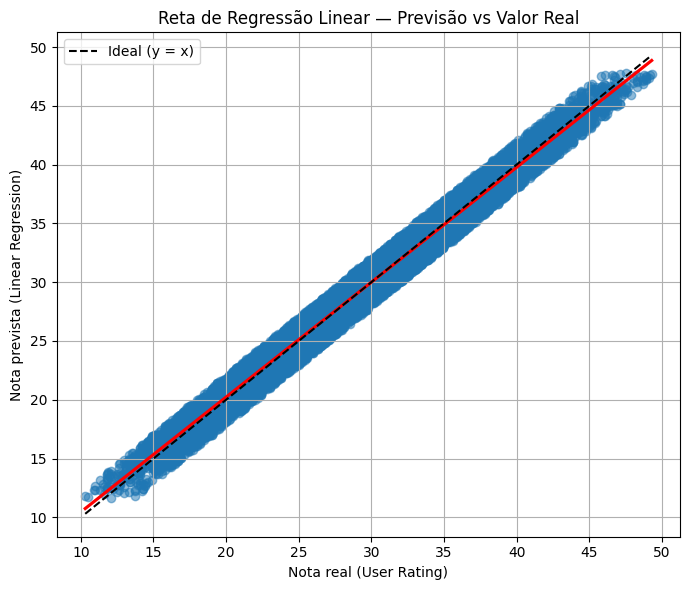

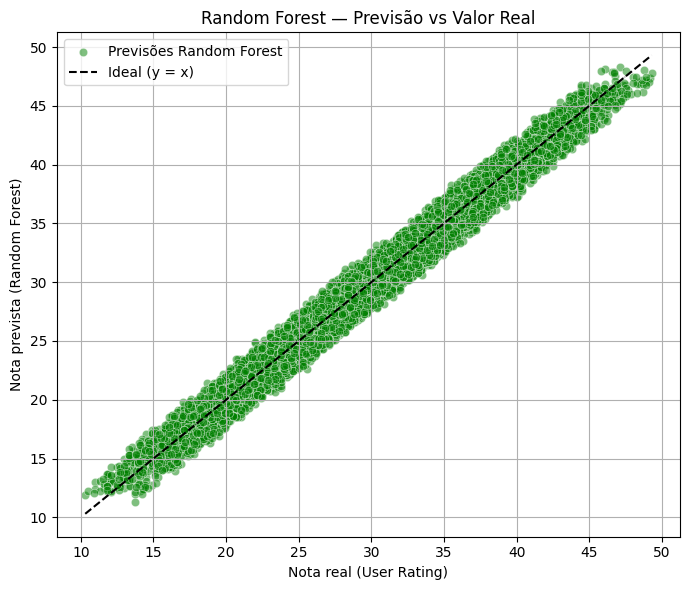

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotando regressão linear
plt.figure(figsize=(7,6))
sns.regplot(x=y_test, y=y_pred_lr, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='black', linestyle='--', label='Ideal (y = x)')
plt.title('Reta de Regressão Linear — Previsão vs Valor Real')
plt.xlabel('Nota real (User Rating)')
plt.ylabel('Nota prevista (Linear Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Plotando Random Forest
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5, color='green', label='Previsões Random Forest')
sns.lineplot(x=y_test, y=y_test, color='black', linestyle='--', label='Ideal (y = x)')
plt.title('Random Forest — Previsão vs Valor Real')
plt.xlabel('Nota real (User Rating)')
plt.ylabel('Nota prevista (Random Forest)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
